In [12]:
import numpy as np
import os
from matplotlib import pyplot as plt

In [15]:
path = '/envau/work/invibe/USERS/IBOS/data/Riesling/TSCM/OpenEphys/plots2/decoding/lip/lip_neutral_1000it_all_in_win100.npy'
threshole = 0.5
step=10
fix_duration = 200

In [16]:
scores = np.load(path)

In [17]:
time = ((np.arange(0, scores.shape[1])) - fix_duration / step) * 10
avg_below = np.sum(scores <= threshole, axis=0) / scores.shape[0]
mask_inf = avg_below <= 0.01
mask_inf_5 = avg_below <= 0.05
print('Latency below 1%%: %f'%time[mask_inf][0])
print('Latency below 5%%: %f'%time[mask_inf_5][0])

Latency below 1%: 100.000000
Latency below 5%: 90.000000


Text(0.5, 0.98, 'lip_neutral_1000it_all_in_win100.npy')

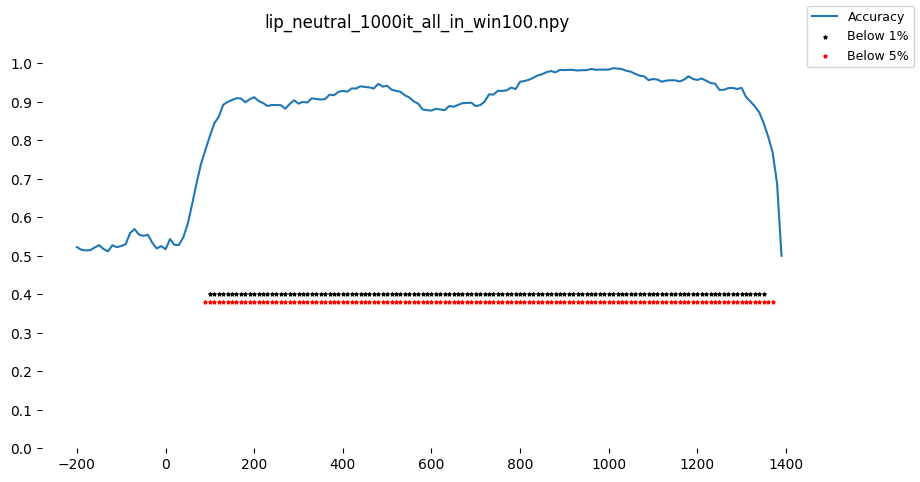

In [18]:
s_path = os.path.normpath(path).split(os.sep)
fig,ax = plt.subplots(figsize=(10,5))
x = ((np.arange(0, len(scores[0]))) - fix_duration / step) * 10
ax.plot(x, np.array(scores).mean(axis=0), label="Accuracy")

ss = np.sum(np.array(scores) <= threshole, axis=0) / np.array(scores).shape[0]
mask_inf = ss <= 0.01
mask_inf_5 = ss <= 0.05
# stars
ax.scatter(
    x[mask_inf],
    [threshole - 0.1] * len(x[mask_inf]),
    color="k",
    marker="*",
    label="Below 1%",
    s=6,
)
ax.scatter(
    x[mask_inf_5],
    [threshole - 0.12] * len(x[mask_inf_5]),
    color="r",
    marker="*",
    label="Below 5%",
    s=6,
)
ax.set_ylim(0, 1)
ax.set_yticks(np.arange(0, 1.1, 0.1))
# delete boundaries
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
fig.legend(fontsize=9)
fig.suptitle(
    "%s"
    % (s_path[-1])
)